In [1]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import graphviz
import numpy as np
import math
import operator
import matplotlib
import function as fn
from robustness.util import *
import robustness.util as rb

None


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [2]:
dataset_options = {
    1 : 'data/mathoverflow/sx-mathoverflow-a2q.txt',
    2 : 'data/mathoverflow/sx-mathoverflow-c2q.txt',
    3 : 'data/mathoverflow/sx-mathoverflow-c2a.txt',
    4 : 'data/mathoverflow/sx-mathoverflow.txt',
}

In [3]:
nodes, edges_per_t = fn.read_graph_from_file(dataset_options[4])

In [16]:
print(len(edges_per_t))

505784


In [4]:
G2 = fn.generate_aggregated_graph(nodes, edges_per_t)

In [6]:
G2_undirected = 

None


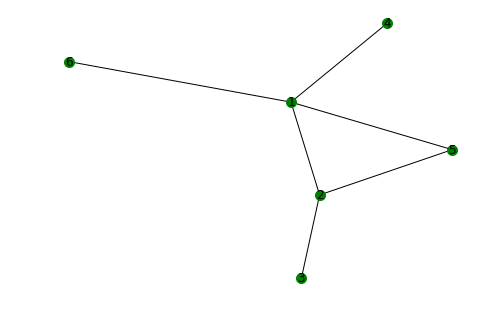

In [2]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(1, 4)
G.add_edge(1, 5)
G.add_edge(1, 6)
G.add_edge(2, 5)

node_ranking = get_nodes_ordered_by_betweeness(G)
print(make_failed_nodes_graph(G,node_ranking))

False